In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

In [3]:
# Specify the directory and filename for BiLSTM data
directory = "K-Fold BiLSTM"
filename = "mdpe_BiLSTM.pkl"
file_path = f"{directory}/{filename}"

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    mdpe_BiLSTM = pickle.load(file)

# Convert the numpy arrays into a DataFrame
# Assuming the outputs are in the order 'Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz' for each column
output_columns = ['Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz']
all_cycles = []

# Iterate over each fold and format into DataFrame
for fold in mdpe_BiLSTM:
    for cycle_idx in range(fold.shape[0]):  # iterate over each cycle
        for col_idx, col_name in enumerate(output_columns):  # iterate over each output column
            all_cycles.append({
                'Output': col_name,
                'MDPE': fold[cycle_idx, col_idx],
                'Model': 'BiLSTM'
            })

biLSTM_df = pd.DataFrame(all_cycles)

In [8]:
# Define directories for LR and RF models
directories = {
    'Linear Regression': 'Linear Regression Outputs',
    'Random Forest': 'RF Outputs'
}

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Load and combine data from LR and RF models
for model, directory in directories.items():
    file_path = os.path.join(directory, "combined_mdpe_scores.csv")
    model_data = pd.read_csv(file_path)
    model_data['Model'] = model
    combined_data = pd.concat([combined_data, model_data], ignore_index=True)

# Concat biLSTM data last
biLSTM_df['Model'] = 'biLSTM'
combined_data = pd.concat([combined_data, biLSTM_df], ignore_index=True)


/opt/miniconda3/envs/machine_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/machine_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


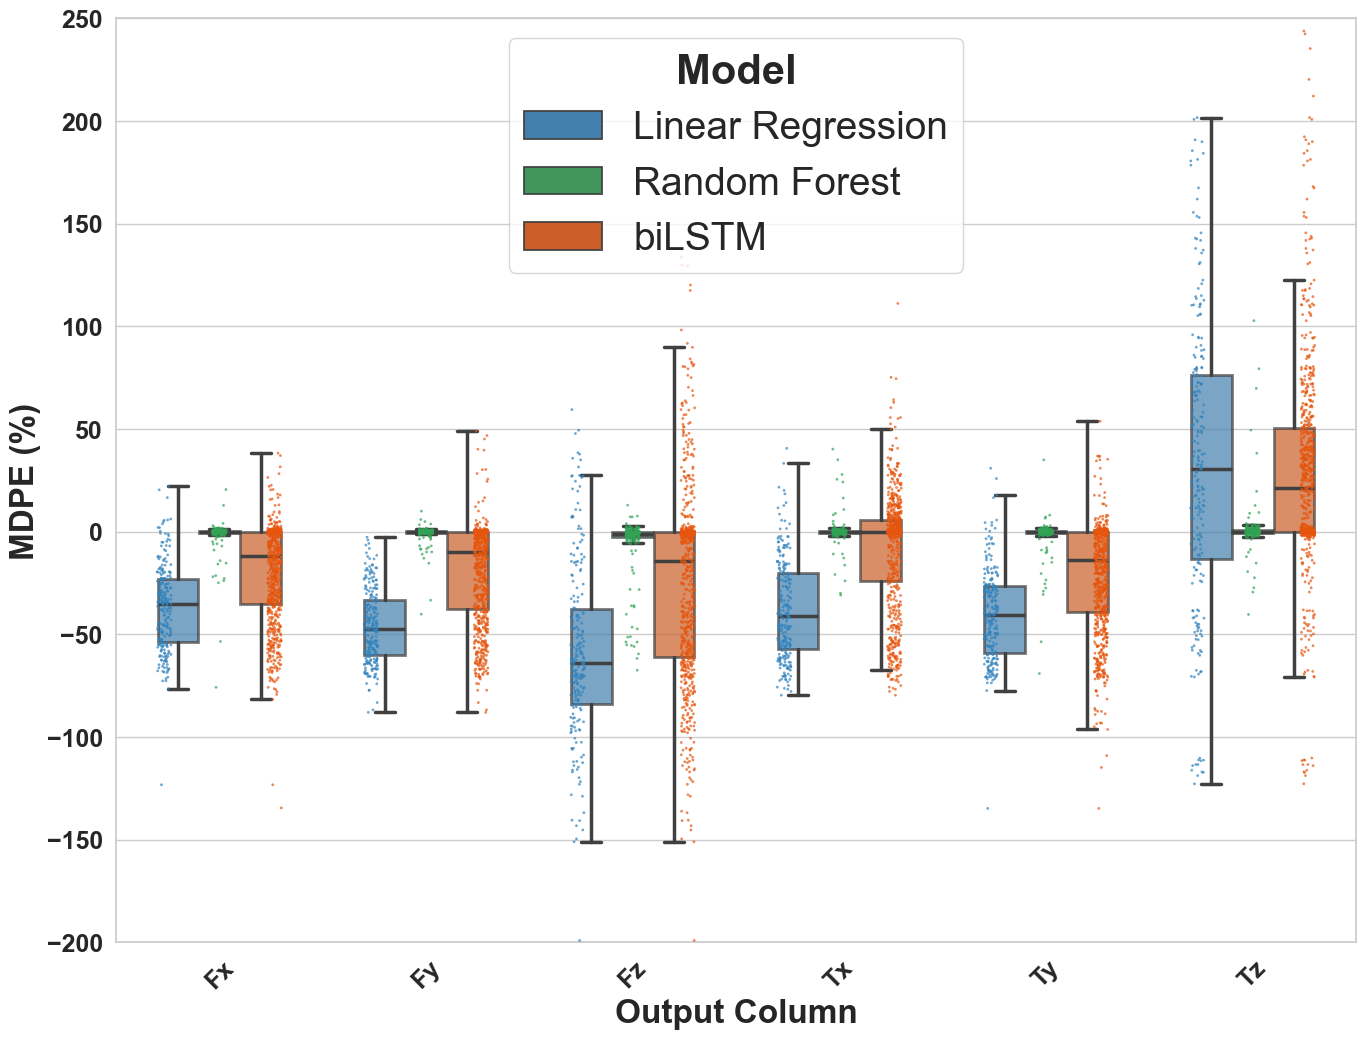

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Ensure os is imported for directory operations

plt.figure(figsize=(16, 12))  # Increased figure size for better visibility

# Define a more vibrant orange color in the palette
palette = ["#3182BD", "#31A354", "#E6550D"]  # #FFA500 is a vivid orange (HTML color code)

sns.set(style="whitegrid")

# Plotting boxplot with adjusted width, increased alpha for darker appearance, and bolder lines
sns.boxplot(x='Output', y='MDPE', hue='Model', data=combined_data, palette=palette, showcaps=True,
            showfliers=False, boxprops=dict(alpha=0.7, linewidth=2), width=0.6, linewidth=2.5)  # Increased alpha and line width

# Adding scatter for individual data points with smaller dot size
sns.stripplot(x='Output', y='MDPE', hue='Model', data=combined_data, palette=palette, dodge=True, jitter=True, size=2, alpha=0.7)

# Aesthetics: setting larger font sizes
plt.ylabel('MDPE (%)', fontsize=24, fontweight='bold')
plt.xlabel('Output Column', fontsize=24, fontweight='bold')
plt.xticks(rotation=45, fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.ylim(-200, 250)  # Adjust the y-axis to display from -200 to 250

# Adjusting legend: keep only one entry per model and remove the stripplot legend
handles, labels = plt.gca().get_legend_handles_labels()
per_model_handles = handles[:3]  # Assuming 3 models
per_model_labels = labels[:3]
legend = plt.legend(per_model_handles, per_model_labels, title='Model', loc='upper center', title_fontsize=30, fontsize=28)

# Set the legend title to bold
legend.get_title().set_fontweight('bold')

# Saving the plot
output_directory = 'Combined Model Outputs'  # Ensure this directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

plt.savefig(os.path.join(output_directory, "combined_MDPE_plot.png"))
plt.show()
plt.close()

In [5]:
import pandas as pd

# Calculate mean and standard deviation for each model and output
stats_df = biLSTM_df.groupby(['Model', 'Output'])['MDPE'].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
stats_df.columns = ['Model', 'Output', 'Mean MDPE', 'Standard Deviation']

In [6]:
# Applying a style to the DataFrame for better readability
styled_df = stats_df.style.bar(subset=['Mean MDPE', 'Standard Deviation'], align='mid', color=['#d65f5f', '#5fba7d'])\
    .set_table_styles([{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center')]},
                       {'selector': 'td', 'props': [('text-align', 'center'), ('font-size', '12px')]}])\
    .set_properties(**{'background-color': 'black', 'color': 'lime'})\
    .set_caption("Average and Standard Deviation of MDPE% Scores Across Models and Outputs")

In [7]:
# Display the styled DataFrame
styled_df

,Model,Output,Mean MDPE,Standard Deviation
0,BiLSTM,Fx,-20.639275,23.451226
1,BiLSTM,Fy,-12.237394,17.067579
2,BiLSTM,Fz,-14.450405,54.706917
3,BiLSTM,Tx,11.266827,20.542144
4,BiLSTM,Ty,-22.738580,27.768273
5,BiLSTM,Tz,58.826491,64.343396
6,Linear Regression,Fx,-36.780458,20.936553
7,Linear Regression,Fy,-46.073137,17.708616
8,Linear Regression,Fz,-61.238635,48.983284
9,Linear Regression,Tx,-38.204011,24.168459


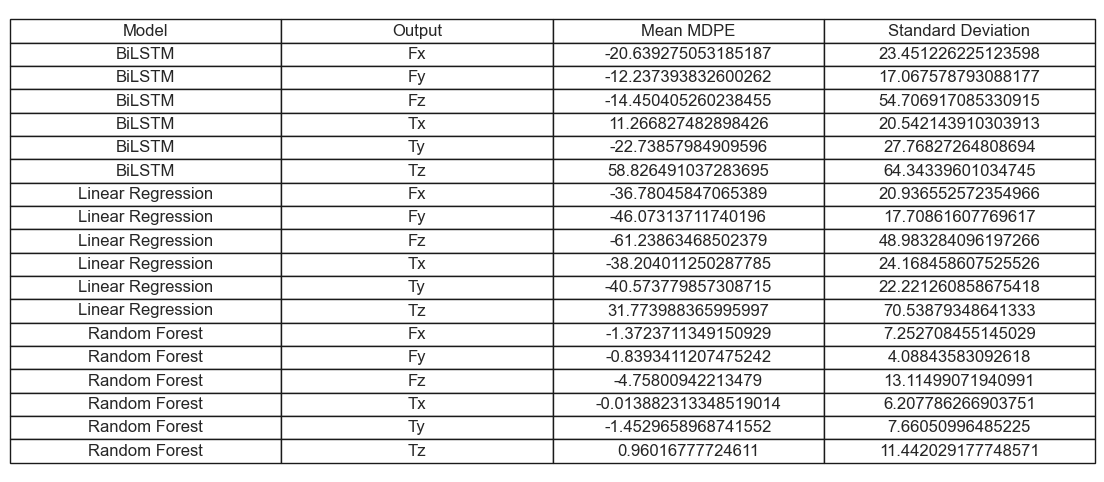

In [8]:
import matplotlib.pyplot as plt

# Create a figure and a plot without axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# Display the table on the axes
the_table = ax.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc = 'center', loc='center')

# Style the table
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.4, 1.4)  # you can adjust the scale for better fit

# Display the plot
plt.show()

In [10]:
import pandas as pd

# First, pivot the DataFrame to get multi-level columns
pivot_df = stats_df.pivot(index='Model', columns='Output', values=['Mean MDPE', 'Standard Deviation'])

# Access the multi-level columns and format them
formatted_df = pivot_df.stack(level=1).apply(lambda x: f"{x['Mean MDPE']:.2f} ± {x['Standard Deviation']:.2f}", axis=1).unstack(level=1)

/var/folders/n8/kn3_t_b17xqb63cgxp4k7_8w0000gn/T/ipykernel_64973/651105631.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  formatted_df = pivot_df.stack(level=1).apply(lambda x: f"{x['Mean MDPE']:.2f} ± {x['Standard Deviation']:.2f}", axis=1).unstack(level=1)


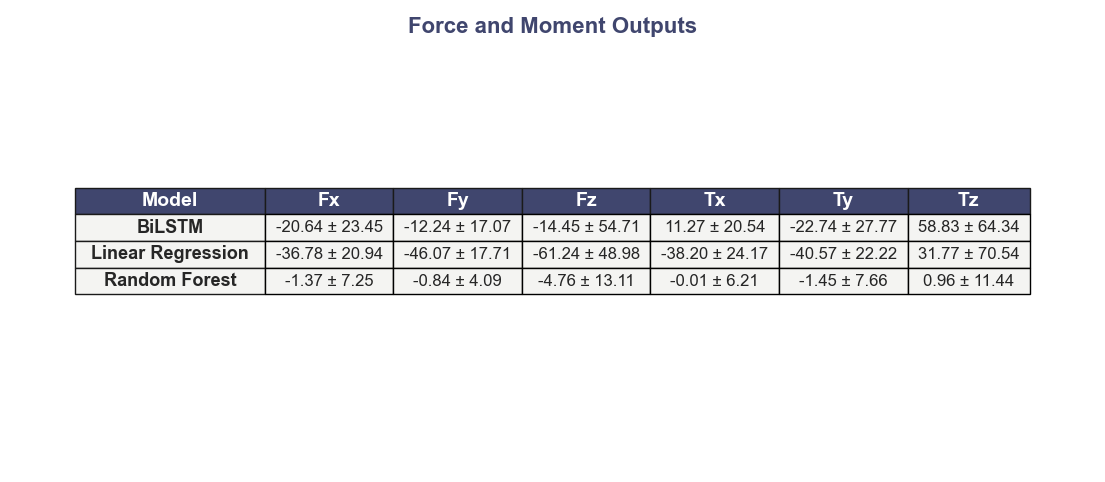

In [12]:
import matplotlib.pyplot as plt

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_frame_on(False)  # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

# Create the table, adding +1 for the index column (Model)
table_data = formatted_df.reset_index()
table = ax.table(cellText=table_data.values, colLabels=formatted_df.columns.insert(0, 'Model'), loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.6)  # Adjust scale for better fit
table.auto_set_column_width(col=list(range(len(table_data.columns))))  # Adjust to fit column contents

# Color and style adjustments
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(14)  # Make the header larger
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='white')
    elif j == 0:
        cell.set_fontsize(13)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f4f4f2')
    else:
        cell.set_facecolor('#f4f4f2')
        cell.set_edgecolor('black')

# Add a label above the output columns
plt.text(0.5, 0.95, 'Force and Moment Outputs', fontsize=16, fontweight='bold', ha='center', transform=ax.transAxes, color='#40466e')

# Show the plot
plt.show()

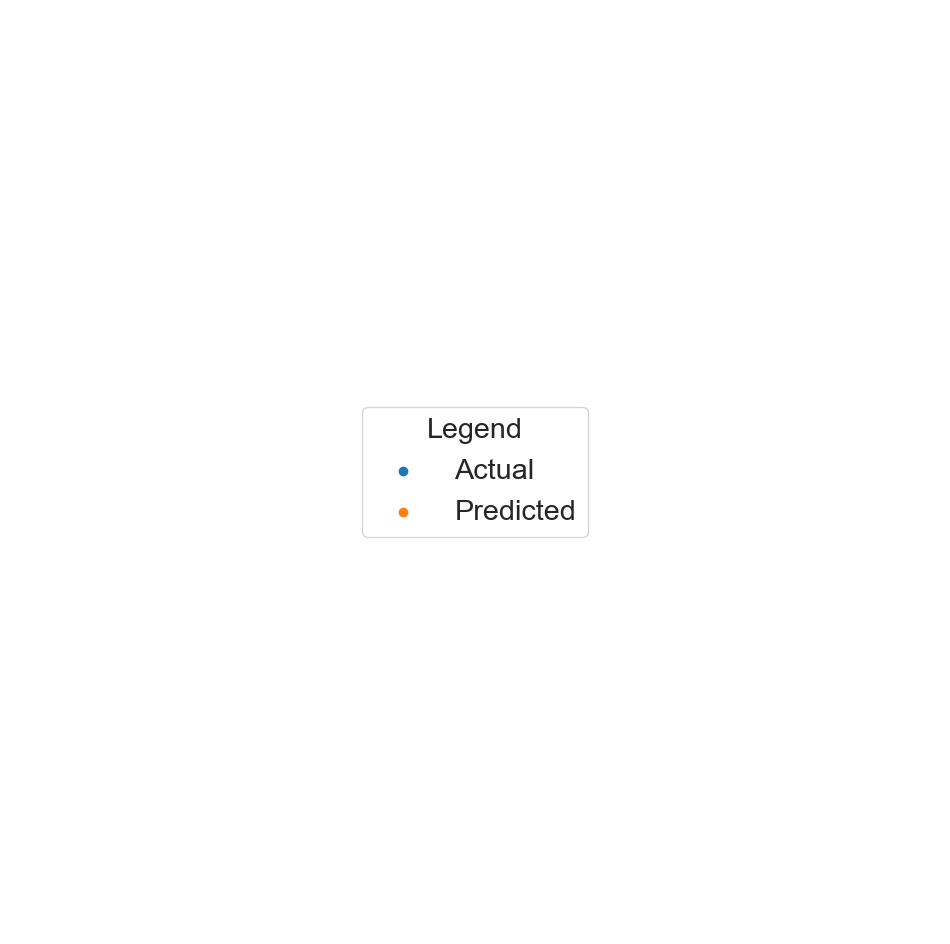

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axis to plot the legend
fig, ax = plt.subplots(figsize=(12, 12))

# Create legend entries without actual plots
ax.scatter([], [], color='tab:blue', label='Actual')
ax.scatter([], [], color='tab:orange', label='Predicted')

# Hide the axes
ax.axis('off')

# Create and enlarge the legend
legend = ax.legend(loc='center', fontsize='xx-large', title='Legend', title_fontsize='xx-large')

# Show the legend only
plt.show()


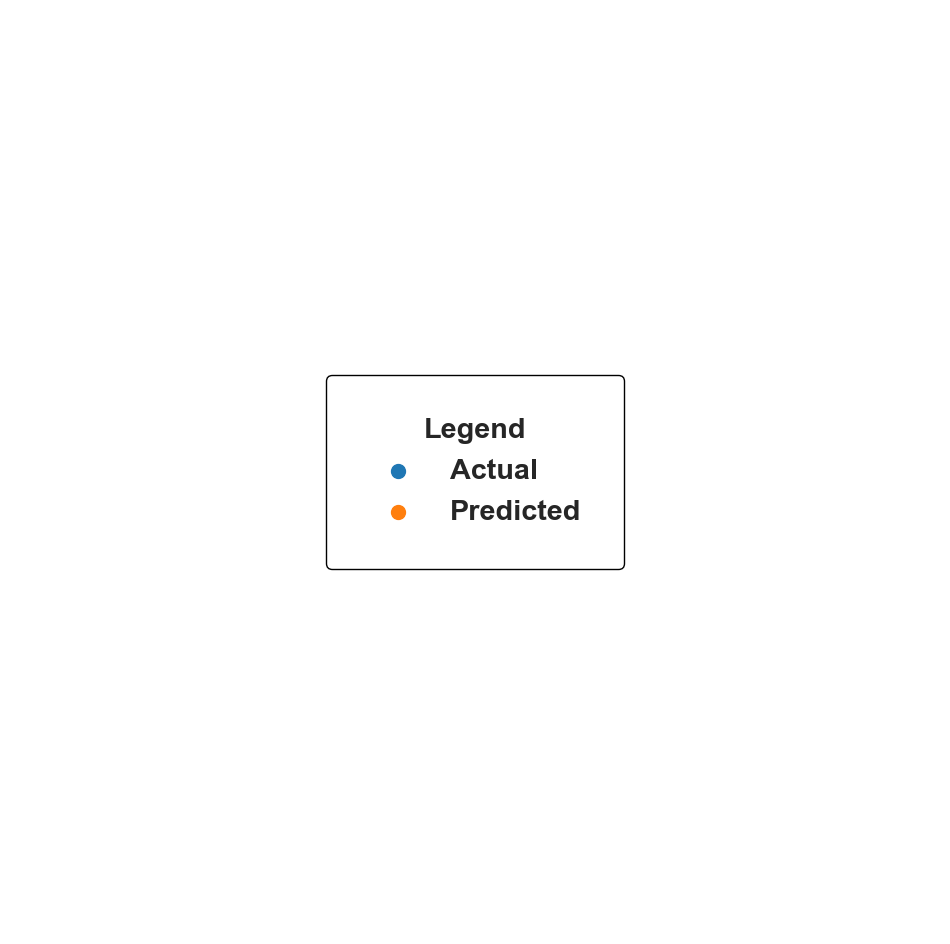

In [18]:
import matplotlib.pyplot as plt

# Create a figure and axis to plot the legend
fig, ax = plt.subplots(figsize=(12, 12))

# Create legend entries without actual plots, with larger marker size
ax.scatter([], [], color='tab:blue', label='Actual', s=100)  # Increase marker size with `s=100`
ax.scatter([], [], color='tab:orange', label='Predicted', s=100)

# Hide the axes
ax.axis('off')

# Create and enlarge the legend with bold text and custom border
legend = ax.legend(
    loc='center', 
    fontsize='xx-large', 
    title='Legend', 
    title_fontsize='xx-large',
    frameon=True,  # Ensure the frame is on
    edgecolor='black',  # Darken the border color
    framealpha=1,  # Make the frame fully opaque
    borderpad=1.5  # Increase the padding within the frame
)

# Set the legend text to be bold
plt.setp(legend.get_texts(), fontweight='bold')
plt.setp(legend.get_title(), fontweight='bold')

# Show the legend only
plt.show()


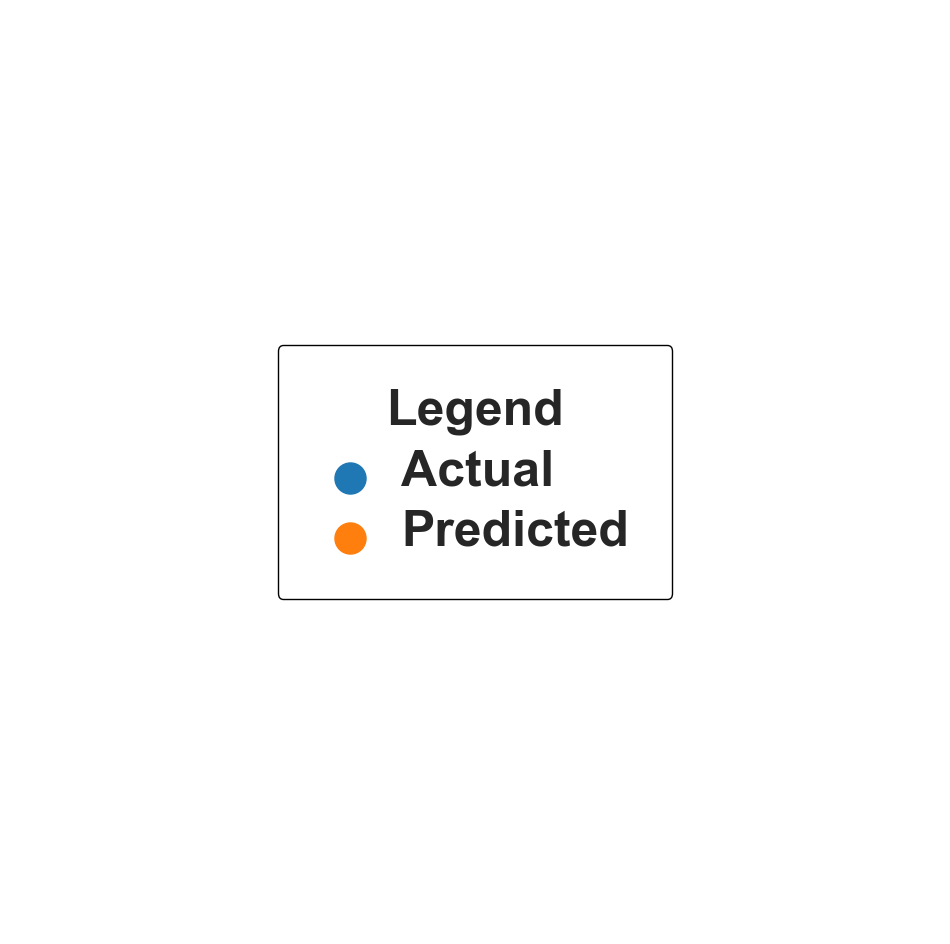

In [20]:
import matplotlib.pyplot as plt

# Create a figure and axis to plot the legend
fig, ax = plt.subplots(figsize=(12, 12))

# Create legend entries without actual plots, with a significantly larger marker size
ax.scatter([], [], color='tab:blue', label='Actual', s=500)  # Increase marker size with `s=500`
ax.scatter([], [], color='tab:orange', label='Predicted', s=500)

# Hide the axes
ax.axis('off')

# Create and enlarge the legend with very large bold text
legend = ax.legend(
    loc='center', 
    fontsize='xx-large',  # Adjust fontsize if needed
    title='Legend', 
    title_fontsize='xx-large',
    frameon=True,  # Ensure the frame is on
    edgecolor='black',  # Darken the border color
    framealpha=1,  # Make the frame fully opaque
    borderpad=1.5  # Increase the padding within the frame
)

# Increase the font size and set the font weight to bold
plt.setp(legend.get_texts(), fontsize='36', fontweight='bold')  # Adjust fontsize here
plt.setp(legend.get_title(), fontsize='36', fontweight='bold')  # Adjust fontsize here

# Show the legend only
plt.show()
